# Predicting the future variance of HSI

# Method

Predict the value for t using data t-30 to t-1. Then calculate Variance

Importing dependency

In [10]:
# data analysis
import numpy as np
import pandas
import math
#data visulization
import matplotlib.pyplot as plt
#building the network
from pandas import Series , DataFrame, Panel
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras import metrics

Loading the dataset, as well as splitting up the data into traning and testing using a 67% split

In [11]:
# load the dataset
dataframe = pandas.read_csv('C:\\Users\\tcheng\\Documents\HSI1.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [12]:
train_size, test_size

(131, 65)

As it show, we have 131 Training Sample, and 65 Testing Sample
# creating the dataset

We must create a moving window for our dataset.
Our training X must contain 29 value T-30 to T-1. And our corresponding Y will be the actual value at T

In [13]:
# convert an array of values into a dataset matrix

np.random.seed(7)
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)


In [14]:
look_back = 29#we want data from T-30 to T-1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

Taking a look at our how dataset look like (first 3 value)

In [15]:
trainX[:3,:]

array([[ 18185.58984375,  18259.02929688,  18520.52929688,  18678.2890625 ,
         18502.33984375,  18953.63085938,  18872.56054688,  19026.51953125,
         18808.40039062,  19233.93945312,  19427.81054688,  19416.66992188,
         19518.84960938,  19265.0703125 ,  18995.13085938,  18897.44921875,
         18981.83984375,  19176.94921875,  19025.26953125,  19441.4609375 ,
         19735.52929688,  19709.75      ,  19809.13085938,  19800.640625  ,
         19428.08984375,  19396.359375  ,  19419.86914062,  19025.109375  ,
         19092.63085938],
       [ 18259.02929688,  18520.52929688,  18678.2890625 ,  18502.33984375,
         18953.63085938,  18872.56054688,  19026.51953125,  18808.40039062,
         19233.93945312,  19427.81054688,  19416.66992188,  19518.84960938,
         19265.0703125 ,  18995.13085938,  18897.44921875,  18981.83984375,
         19176.94921875,  19025.26953125,  19441.4609375 ,  19735.52929688,
         19709.75      ,  19809.13085938,  19800.640625  ,  19

In [16]:
trainY[:3]

array([ 19121.33984375,  19455.33007812,  19239.88085938], dtype=float32)

Building our model. We will use a network of 29->[30]->[12]->1
Our network is composed of 4 layer.  
A input layer of 29 neuron,  
2 hidden layer of 30 and 12 neuron  
as well as 1 final output laying outputting a single value of our prediciton.  

In [17]:
model = Sequential()
model.add(Dense(30,input_dim=look_back, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1,activation='linear'))


Here we will be using mean squared error as our cost function. And adam as our optimzer (a gradient descent learning)

In [18]:
model.compile(loss='mean_squared_error', optimizer='adam')

# Running the model

We will be ssing batch size of 2 each and 200 epochs.   
(epochs = the amount of complete iteration )

In [19]:
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)

Epoch 1/200
0s - loss: 23114948.4657
Epoch 2/200
0s - loss: 452499.9413
Epoch 3/200
0s - loss: 316863.0085
Epoch 4/200
0s - loss: 328232.1486
Epoch 5/200
0s - loss: 343870.5061
Epoch 6/200
0s - loss: 323554.5271
Epoch 7/200
0s - loss: 531044.7146
Epoch 8/200
0s - loss: 436376.3255
Epoch 9/200
0s - loss: 353116.4817
Epoch 10/200
0s - loss: 330161.4022
Epoch 11/200
0s - loss: 420463.7882
Epoch 12/200
0s - loss: 335976.8064
Epoch 13/200
0s - loss: 287835.9268
Epoch 14/200
0s - loss: 511492.9604
Epoch 15/200
0s - loss: 428219.4412
Epoch 16/200
0s - loss: 377478.1548
Epoch 17/200
0s - loss: 419024.0603
Epoch 18/200
0s - loss: 453571.0994
Epoch 19/200
0s - loss: 315419.6816
Epoch 20/200
0s - loss: 271683.7730
Epoch 21/200
0s - loss: 319529.5409
Epoch 22/200
0s - loss: 392656.4217
Epoch 23/200
0s - loss: 330885.5570
Epoch 24/200
0s - loss: 335918.4877
Epoch 25/200
0s - loss: 302925.9996
Epoch 26/200
0s - loss: 344029.1263
Epoch 27/200
0s - loss: 276266.7959
Epoch 28/200
0s - loss: 482022.2622

# Evaluating our score to see how well we did

In [20]:
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)


Train Score: 88000.23 MSE (296.65 RMSE)
Test Score: 122423.05 MSE (349.89 RMSE)


In [21]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)

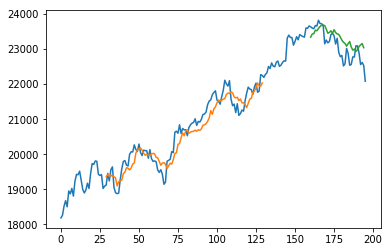

In [22]:
plt.show()

Finally, using our predicted value, we will calculate the variance using data From T-30 to T-1 and our predicted T

In [26]:

# plotting our base plot
f, axarr = plt.subplots(sharex=True,squeeze=False)
axarr = axarr.flatten()
axarr[0].plot(dataset , label = 'data')
axarr[0].plot(trainPredictPlot,label = 'training')
axarr[0].plot(testPredictPlot, label = 'testing')

#plt.plot(futurePredictPlot)
axarr[0].set_title('Prediction Line')

def rolling_window(a, window):
    shape = a.shape[:-1] + (a.shape[-1] - window + 1, window)
    strides = a.strides + (a.strides[-1],)
    return np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)


In [30]:

#creating a new dataset for prediction
predictionX , PredictionY = create_dataset(dataset,look_back)
prestack1 ,prestack2  = predictionX, PredictionY
datatodate = prestack1
#taking the data of the last 30 day, then deleteing the last column
np.delete(prestack1,look_back-1,axis =1)
#varPrep = np.hstack((prestack1,prestack2))
#varPrep2 = np.hstack((prestack1,prestack3))

#making our prediction of the new column
prediction = model.predict(predictionX)


#calculating variance
value = np.hstack((prestack1,prediction))
var  = np.empty(len(dataset))
var  [:] = np.nan
var [look_back+1:]= np.var(value,axis = 1,)

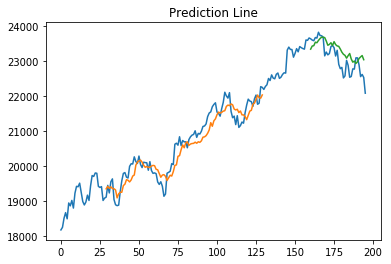

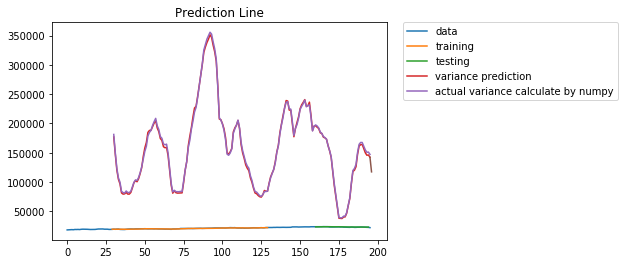

In [31]:
#calculating the real variance 
Rvar  = np.empty(len(dataset))
Rvar  [:] = np.nan
Rvar [look_back+1:]= np.var(prestack1, axis=1)


#plotting

#axarr[0].plot(np.var(varPrep,axis=1), label = 'variance prediction for training data')
#axarr[0].plot(np.var(varPrep2,axis=1),label = 'variance prediction for testing data')
axarr[0].plot( var,label = "variance prediction")
axarr[0].plot(Rvar, label = 'actual variance calculate by numpy')
axarr[0].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#Data = Series(dataset, index = dates)
#Series.rolling(Data,window=3,center=False).mean().plot(style='b--')
#Series.rolling(Data,window=3,center=False).var().plot(style='r--')
#Data.plot(style='k'


Pvar = np.empty(len(dataset))
Pvar[:]=np.nan
Pvar[-1] = var[-1]
Pvar= np.append(Pvar,np.var(np.append(dataset[-29:-1],model.predict(dataset[-30:-1].T))))

axarr[0].plot(Pvar)
#axarr[1].plot(error)
#axarr[1].set_title('Error ')
#axarr[1].axhline(0, color='black')
plt.show()

# The Entire Code is availble below:

131 65
Epoch 1/200
0s - loss: 20464204.6088
Epoch 2/200
0s - loss: 373801.7751
Epoch 3/200
0s - loss: 263779.5382
Epoch 4/200
0s - loss: 371246.3443
Epoch 5/200
0s - loss: 282643.6870
Epoch 6/200
0s - loss: 320378.0581
Epoch 7/200
0s - loss: 312767.4685
Epoch 8/200
0s - loss: 283006.4478
Epoch 9/200
0s - loss: 359528.4415
Epoch 10/200
0s - loss: 354817.9288
Epoch 11/200
0s - loss: 312441.1449
Epoch 12/200
0s - loss: 341862.8395
Epoch 13/200
0s - loss: 328817.9025
Epoch 14/200
0s - loss: 410224.4040
Epoch 15/200
0s - loss: 408990.1095
Epoch 16/200
0s - loss: 304360.1969
Epoch 17/200
0s - loss: 476936.2640
Epoch 18/200
0s - loss: 307675.4531
Epoch 19/200
0s - loss: 354130.9735
Epoch 20/200
0s - loss: 364408.2064
Epoch 21/200
0s - loss: 365764.0634
Epoch 22/200
0s - loss: 454309.4996
Epoch 23/200
0s - loss: 371556.5746
Epoch 24/200
0s - loss: 461167.4883
Epoch 25/200
0s - loss: 559676.7122
Epoch 26/200
0s - loss: 387146.4691
Epoch 27/200
0s - loss: 280554.7007
Epoch 28/200
0s - loss: 2527

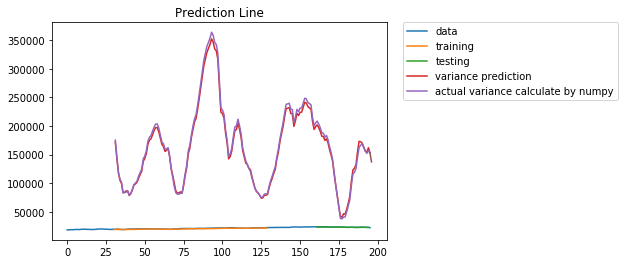

In [32]:

import numpy as np
import matplotlib.pyplot as plt
import pandas
import math

from pandas import Series , DataFrame, Panel
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras import metrics

np.random.seed(7)
# load the dataset
dataframe = pandas.read_csv('C:\\Users\\tcheng\\Documents\HSI1.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)


look_back = 30
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


model = Sequential()
model.add(Dense(30,input_dim=look_back, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1,activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)

trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))



trainPredict = model.predict(trainX)
testPredict = model.predict(testX)


trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

f, axarr = plt.subplots(sharex=True,squeeze=False)

axarr = axarr.flatten()


axarr[0].plot(dataset , label = 'data')
axarr[0].plot(trainPredictPlot,label = 'training')
axarr[0].plot(testPredictPlot, label = 'testing')


#plt.plot(futurePredictPlot)
axarr[0].set_title('Prediction Line')

def rolling_window(a, window):
    shape = a.shape[:-1] + (a.shape[-1] - window + 1, window)
    strides = a.strides + (a.strides[-1],)
    return np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)



predictionX , PredictionY = create_dataset(dataset,look_back)
prestack1 ,prestack2  = predictionX, PredictionY
datatodate = prestack1
np.delete(prestack1,look_back-1,axis =1)

#varPrep = np.hstack((prestack1,prestack2))
#varPrep2 = np.hstack((prestack1,prestack3))
prediction = model.predict(predictionX)

value = np.hstack((prestack1,prediction))
var  = np.empty(len(dataset))
var  [:] = np.nan
var [look_back+1:]= np.var(value,axis = 1,)

Rvar  = np.empty(len(dataset))
Rvar  [:] = np.nan
Rvar [look_back+1:]= np.var(prestack1, axis=1)




#axarr[0].plot(np.var(varPrep,axis=1), label = 'variance prediction for training data')
#axarr[0].plot(np.var(varPrep2,axis=1),label = 'variance prediction for testing data')
axarr[0].plot( var,label = "variance prediction")
axarr[0].plot(Rvar, label = 'actual variance calculate by numpy')
axarr[0].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#Data = Series(dataset, index = dates)
#Series.rolling(Data,window=3,center=False).mean().plot(style='b--')
#Series.rolling(Data,window=3,center=False).var().plot(style='r--')
#Data.plot(style='k'


Pvar = np.empty(len(dataset))
Pvar[:]=np.nan
Pvar[-1] = var[-1]
Pvar= np.append(Pvar,np.var(np.append(dataset[-30:-1],model.predict(dataset[-31:-1].T))))

axarr[0].plot(Pvar)
#axarr[1].plot(error)
#axarr[1].set_title('Error ')
#axarr[1].axhline(0, color='black')
plt.show()
